In [37]:
import numpy as np
from numpy.random import multivariate_normal as mvn
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from cycler import cycler

import sys
sys.path.insert(1,'../')
from mfvi_main import *
from lmc_algorithm import langevin_monte_carlo
from BayesianUtils import *

In [38]:
import numpy as np
import pymc3 as pm
import arviz as az
from scipy.special import expit  # For logistic function
from scipy.stats import bernoulli, multivariate_normal as mvn

## Bayesian logistic regression

We first establish the problem parameters by defining $\{(X_i,Y_i)\}_{i=1}^n$ pairs of randomly generated data. We assume access to $V$ and $\nabla V$ as in standard Bayesian settings.

In [39]:
d = 20
n_data = 100 

true_theta = mvn(np.zeros(d), np.eye(d))

Xdata = mvn(np.zeros(d),np.eye(d),size=n_data)
maxeig = np.linalg.eig(Xdata.T @ Xdata)[0][0]
Xdata = Xdata / np.sqrt(maxeig)
probs = softmax(Xdata @ true_theta)
Ydata = bernoulli.rvs(probs)

V = lambda theta: V_logistic(theta, Y=Ydata, X=Xdata)
gradV = lambda theta: gradV_logistic(theta, Y=Ydata, X=Xdata)

TypeError: __call__() got an unexpected keyword argument 'size'

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


/Users/bohanwu/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2 seconds.


MCMC Summary:
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
theta[0]  -0.017  0.939  -1.757    1.718      0.013    0.015    5292.0   
theta[1]  -0.248  0.950  -2.070    1.508      0.014    0.015    4745.0   
theta[2]   0.234  0.915  -1.526    1.845      0.012    0.015    5542.0   
theta[3]   0.023  0.971  -1.700    1.939      0.013    0.017    5602.0   
theta[4]  -0.132  0.908  -1.763    1.597      0.013    0.014    5261.0   
theta[5]  -0.085  0.944  -1.687    1.850      0.013    0.015    5402.0   
theta[6]   0.134  0.930  -1.600    1.792      0.012    0.014    5969.0   
theta[7]  -0.040  0.983  -1.925    1.725      0.014    0.017    5142.0   
theta[8]   0.154  0.963  -1.682    1.958      0.013    0.015    5368.0   
theta[9]   1.017  0.905  -0.664    2.750      0.014    0.011    4371.0   
theta[10] -0.329  0.926  -2.105    1.372      0.012    0.014    5722.0   
theta[11]  0.382  0.929  -1.312    2.137      0.012    0.015    5723.0   
theta[12] -0.017  0.914 

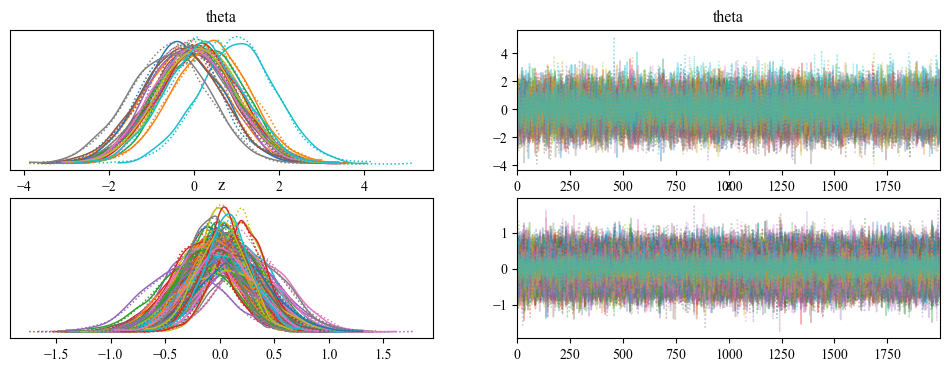

Estimated probabilities (MCMC): [[0.49635425 0.53934588 0.60598455 ... 0.55129947 0.59401489 0.51513804]
 [0.55135479 0.51564757 0.52010973 ... 0.56566495 0.57107632 0.47852645]
 [0.46155638 0.57569763 0.53107365 ... 0.56003684 0.51580355 0.46731355]
 ...
 [0.4853291  0.44451574 0.41704801 ... 0.49133784 0.48425884 0.49528931]
 [0.50690821 0.52921729 0.45187706 ... 0.41613314 0.5509791  0.52708295]
 [0.53942615 0.57734435 0.48698869 ... 0.59004582 0.50014477 0.50729992]]
Model accuracy (MCMC): 0.0


/var/folders/ky/8hp3nd491rdgmwgfgrzsf_xc0000gn/T/ipykernel_74291/984902926.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy_mcmc = np.mean((ppc_probs_mcmc > 0.5).astype(int) == Ydata)


Finished [100%]: Average Loss = 69.431
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bohanwu/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bohanwu/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.w

VI Summary:
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
theta[0]  -0.043  1.037  -1.949    1.918      0.022    0.016    2127.0   
theta[1]  -0.247  1.023  -2.132    1.751      0.023    0.016    1976.0   
theta[2]   0.187  0.997  -1.773    1.995      0.024    0.017    1790.0   
theta[3]   0.045  1.049  -1.988    1.919      0.025    0.018    1731.0   
theta[4]  -0.070  1.031  -1.987    1.930      0.023    0.016    2080.0   
theta[5]  -0.157  1.053  -2.086    1.835      0.024    0.018    2001.0   
theta[6]   0.097  1.013  -1.786    1.993      0.023    0.016    2009.0   
theta[7]  -0.055  1.070  -2.145    1.885      0.024    0.017    2051.0   
theta[8]   0.164  1.030  -1.893    1.978      0.023    0.016    1980.0   
theta[9]   1.024  1.021  -0.806    2.959      0.023    0.016    1984.0   
theta[10] -0.362  1.051  -2.476    1.470      0.024    0.017    1981.0   
theta[11]  0.345  1.046  -1.730    2.185      0.023    0.017    1977.0   
theta[12] -0.039  0.994  -

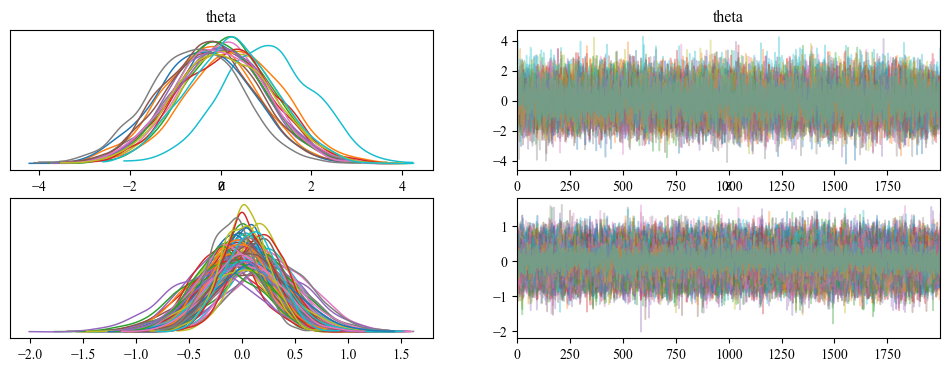

Got error No model on context stack. trying to find log_likelihood in translation.


Estimated probabilities (VI): [0.53142478 0.53308792 0.51744606 0.4940905  0.55014898 0.49069867
 0.47382146 0.50873729 0.5195428  0.49803143 0.51299591 0.53168764
 0.53942914 0.45887226 0.50853839 0.519919   0.57782031 0.54733313
 0.49566245 0.47006598 0.50668657 0.5253488  0.54490997 0.47438757
 0.44476294 0.48644758 0.5275383  0.53018468 0.4847988  0.55096915
 0.52575654 0.45838358 0.52675085 0.49275938 0.56251179 0.51219576
 0.54046157 0.57547069 0.473676   0.47659958 0.51186747 0.47421972
 0.4796311  0.50108253 0.49334038 0.4913618  0.54700654 0.48296506
 0.51204969 0.51591719 0.5115181  0.52369731 0.5001693  0.46591743
 0.49398348 0.49278994 0.49481965 0.52296302 0.45882309 0.49987923
 0.47762613 0.50724225 0.44305623 0.45546764 0.50046582 0.47256492
 0.49481388 0.50455176 0.54444692 0.49084462 0.48589731 0.47730555
 0.47945718 0.48956056 0.47193501 0.51106527 0.51888874 0.51421822
 0.5053738  0.50452813 0.50396582 0.47634163 0.48039141 0.54295663
 0.42425779 0.53208491 0.4650638

/Users/bohanwu/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


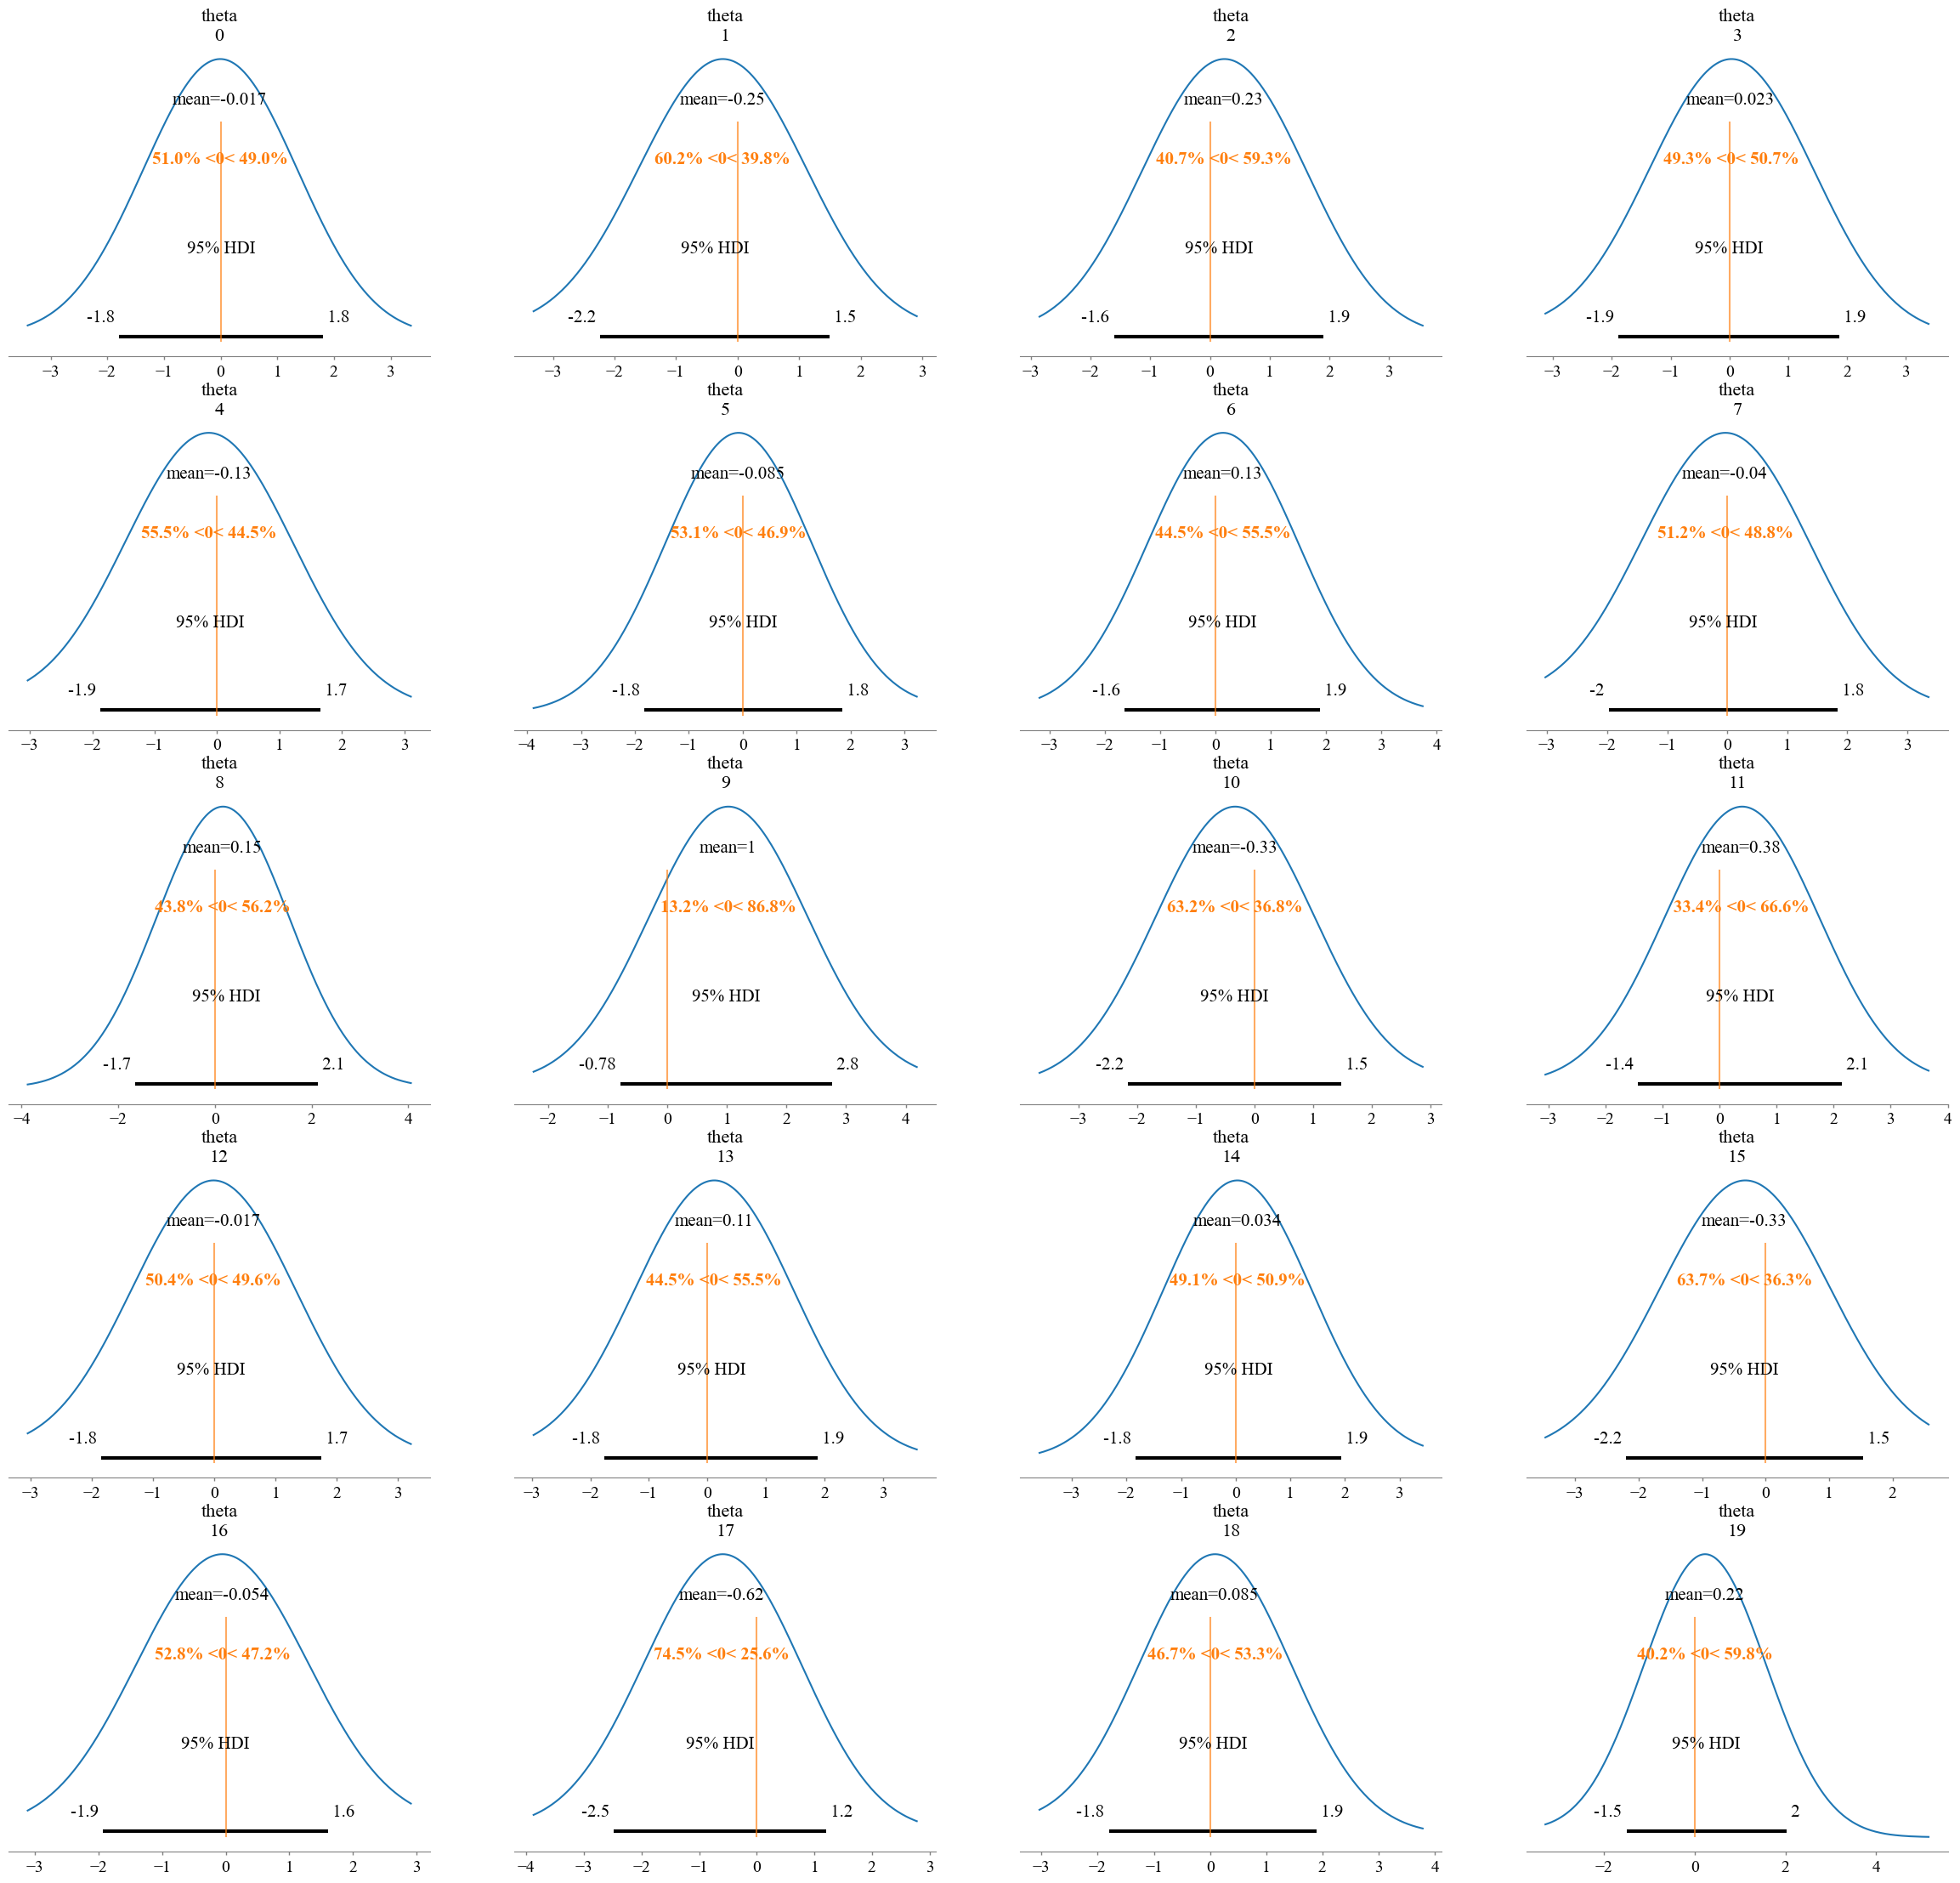

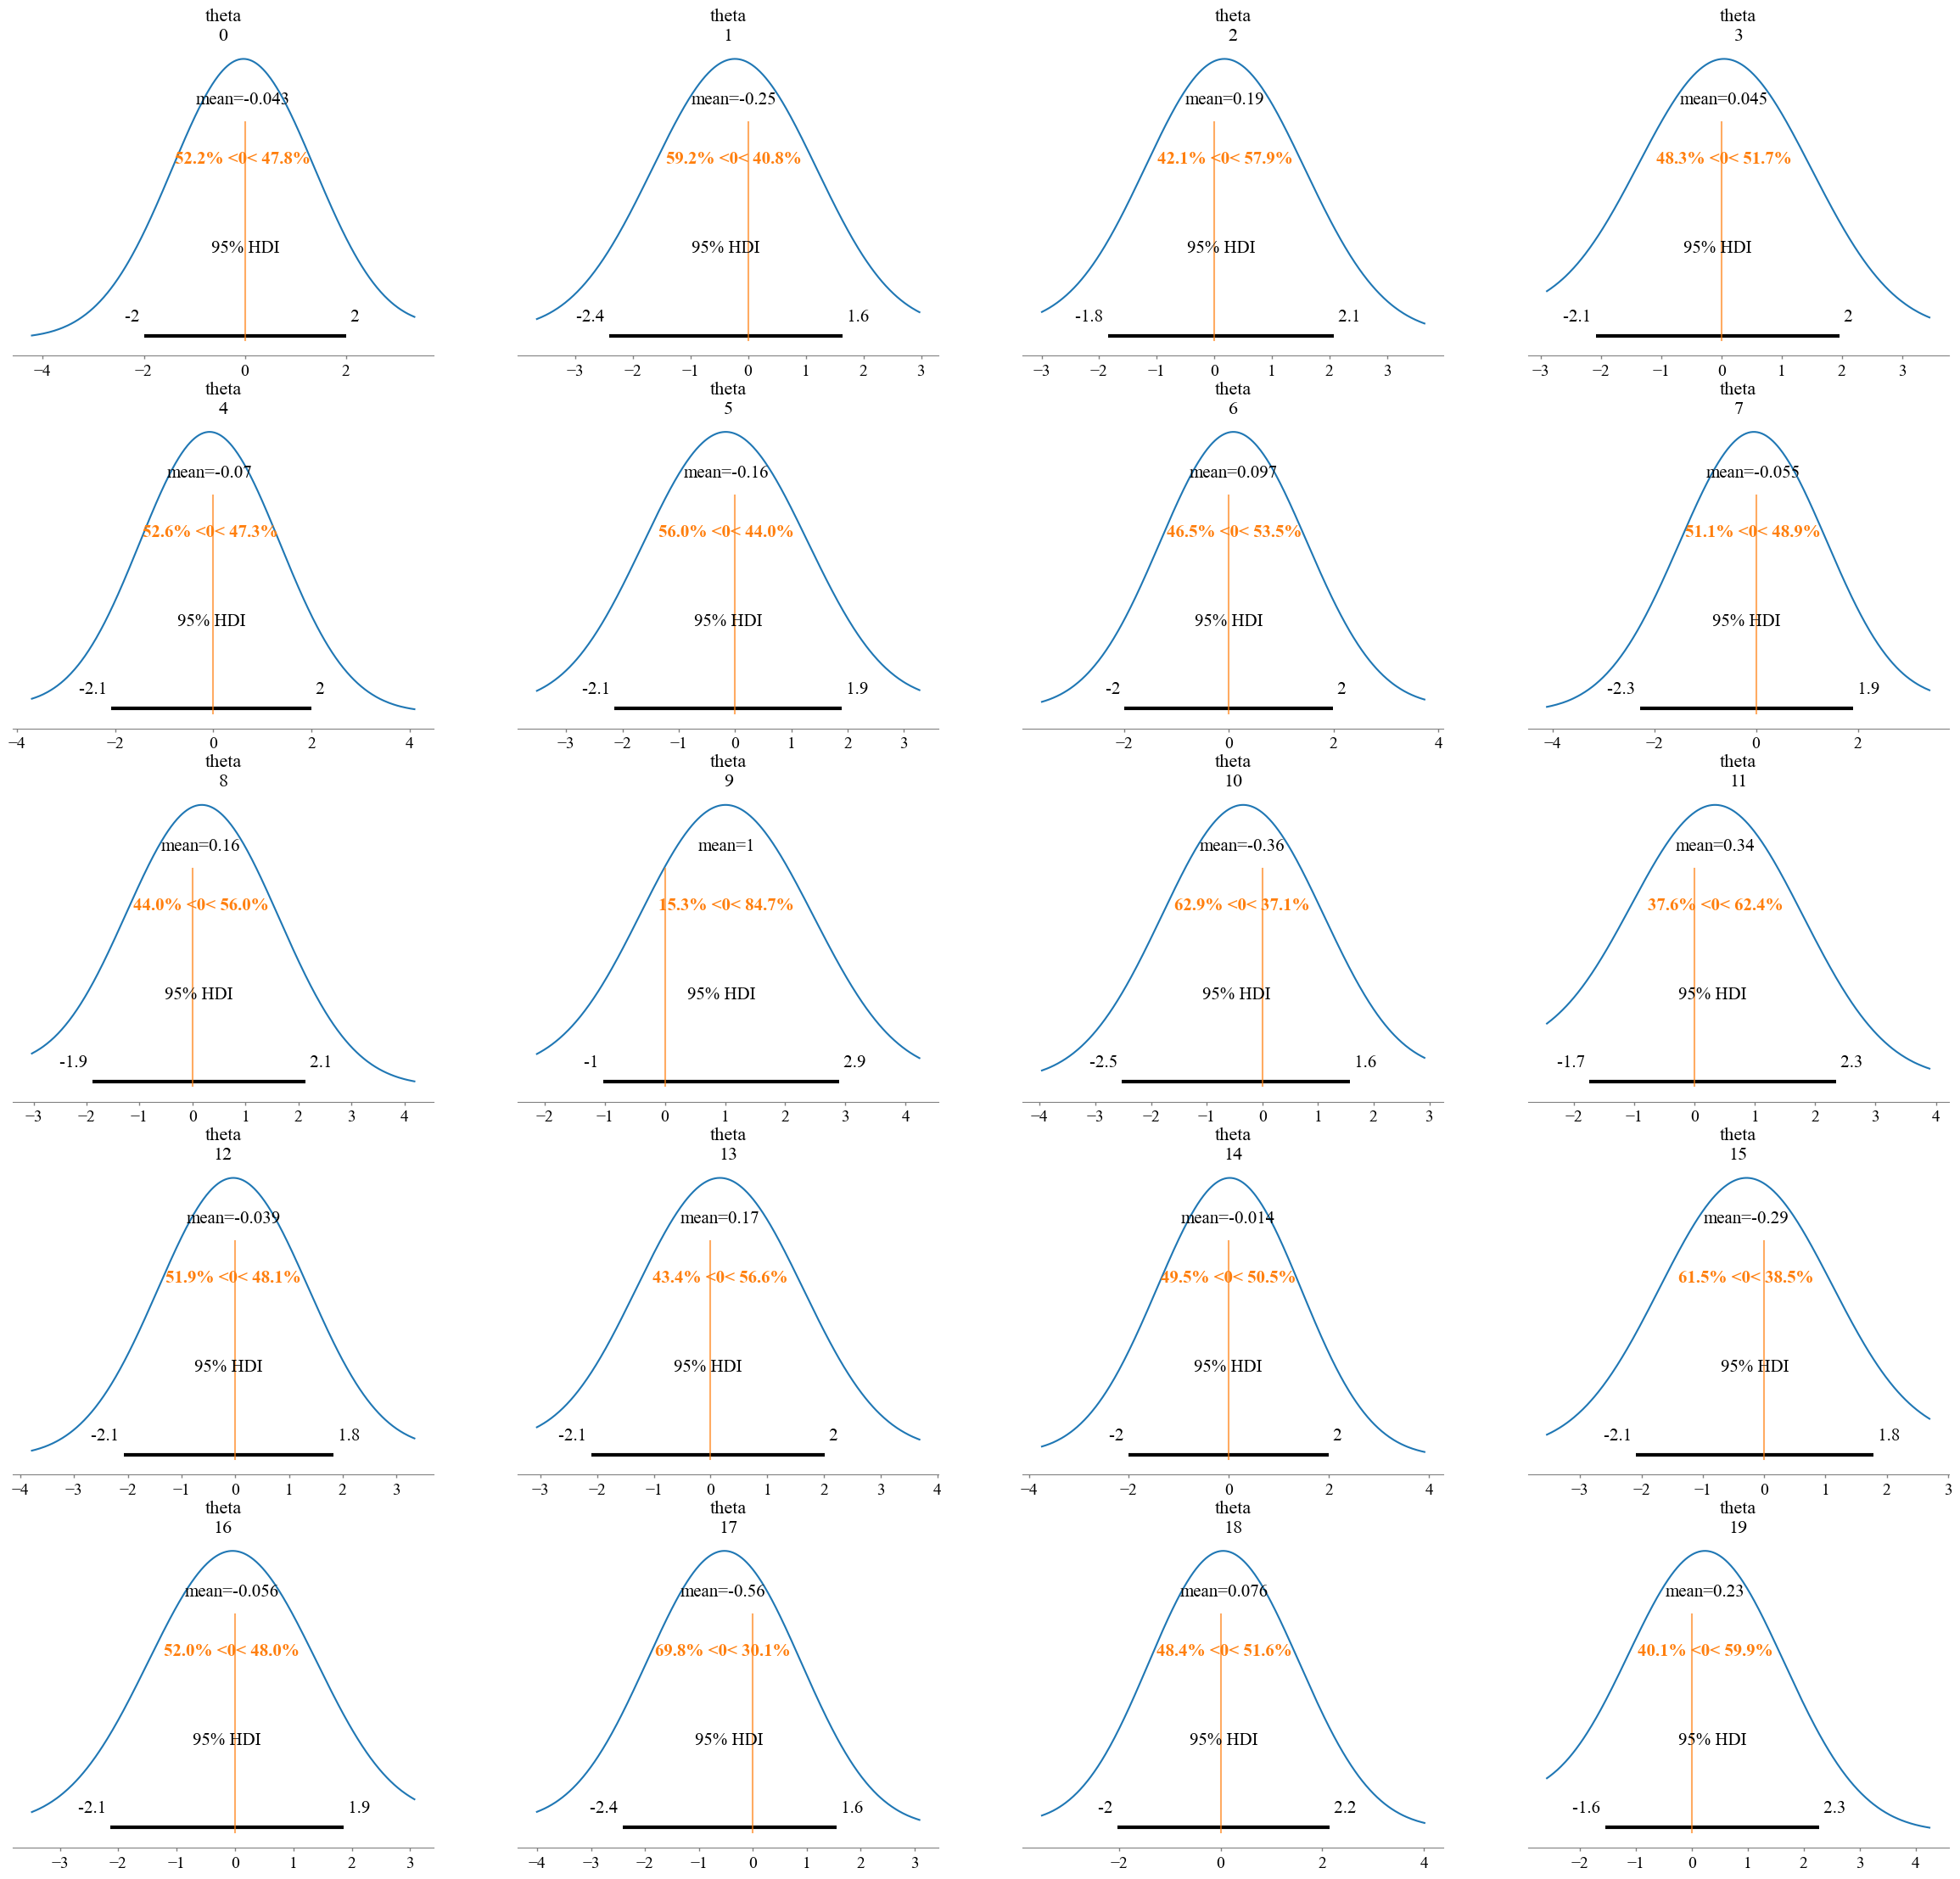

In [49]:
# Create a PyMC3 model
with pm.Model() as model:
    # Priors for the regression coefficients
    theta = pm.MvNormal('theta', mu=np.zeros(d), cov=np.eye(d), shape=d)

    # Linear combination
    z = pm.Deterministic('z', pm.math.dot(Xdata, theta))

    # Likelihood (sampling distribution) of the observations
    y_obs = pm.Bernoulli('y_obs', logit_p=z, observed=Ydata)

    # Inference using MCMC
    trace_mcmc = pm.sample(2000, return_inferencedata=True, cores=1)

# Summary of the trace from MCMC
summary_mcmc = az.summary(trace_mcmc, var_names=["theta"])
print("MCMC Summary:")
print(summary_mcmc)

# Plot the posterior distributions for MCMC
az.plot_trace(trace_mcmc)
plt.show()

# Print estimated probabilities for MCMC
posterior_theta_mcmc = trace_mcmc.posterior['theta'].values
ppc_logits_mcmc = Xdata @ posterior_theta_mcmc.mean(axis=0).T
ppc_probs_mcmc = expit(ppc_logits_mcmc)

print("Estimated probabilities (MCMC):", ppc_probs_mcmc)

# Evaluate the model performance for MCMC
accuracy_mcmc = np.mean((ppc_probs_mcmc > 0.5).astype(int) == Ydata)
print("Model accuracy (MCMC):", accuracy_mcmc)

# Variational Inference
with model:
    approx = pm.fit(n=20000, method='advi')

trace_vi = approx.sample(2000)

# Summary of the trace from VI
summary_vi = az.summary(trace_vi, var_names=["theta"])
print("VI Summary:")
print(summary_vi)

# Plot the posterior distributions for VI
az.plot_trace(trace_vi)
plt.show()

# Print estimated probabilities for VI
posterior_theta_vi = trace_vi['theta']
ppc_logits_vi = Xdata @ posterior_theta_vi.mean(axis=0).T
ppc_probs_vi = expit(ppc_logits_vi)

print("Estimated probabilities (VI):", ppc_probs_vi)

# Evaluate the model performance for VI
accuracy_vi = np.mean((ppc_probs_vi > 0.5).astype(int) == Ydata)
print("Model accuracy (VI):", accuracy_vi)

# Plot the comparison of the two methods
az.plot_posterior(trace_mcmc, var_names=["theta"], hdi_prob=0.95, point_estimate='mean', ref_val=0, kind='kde', round_to=2, bw=1)
az.plot_posterior(trace_vi, var_names=["theta"], hdi_prob=0.95, point_estimate='mean', ref_val=0, kind='kde', round_to=2, bw=1)
plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bohanwu/Library/Python/3.9/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


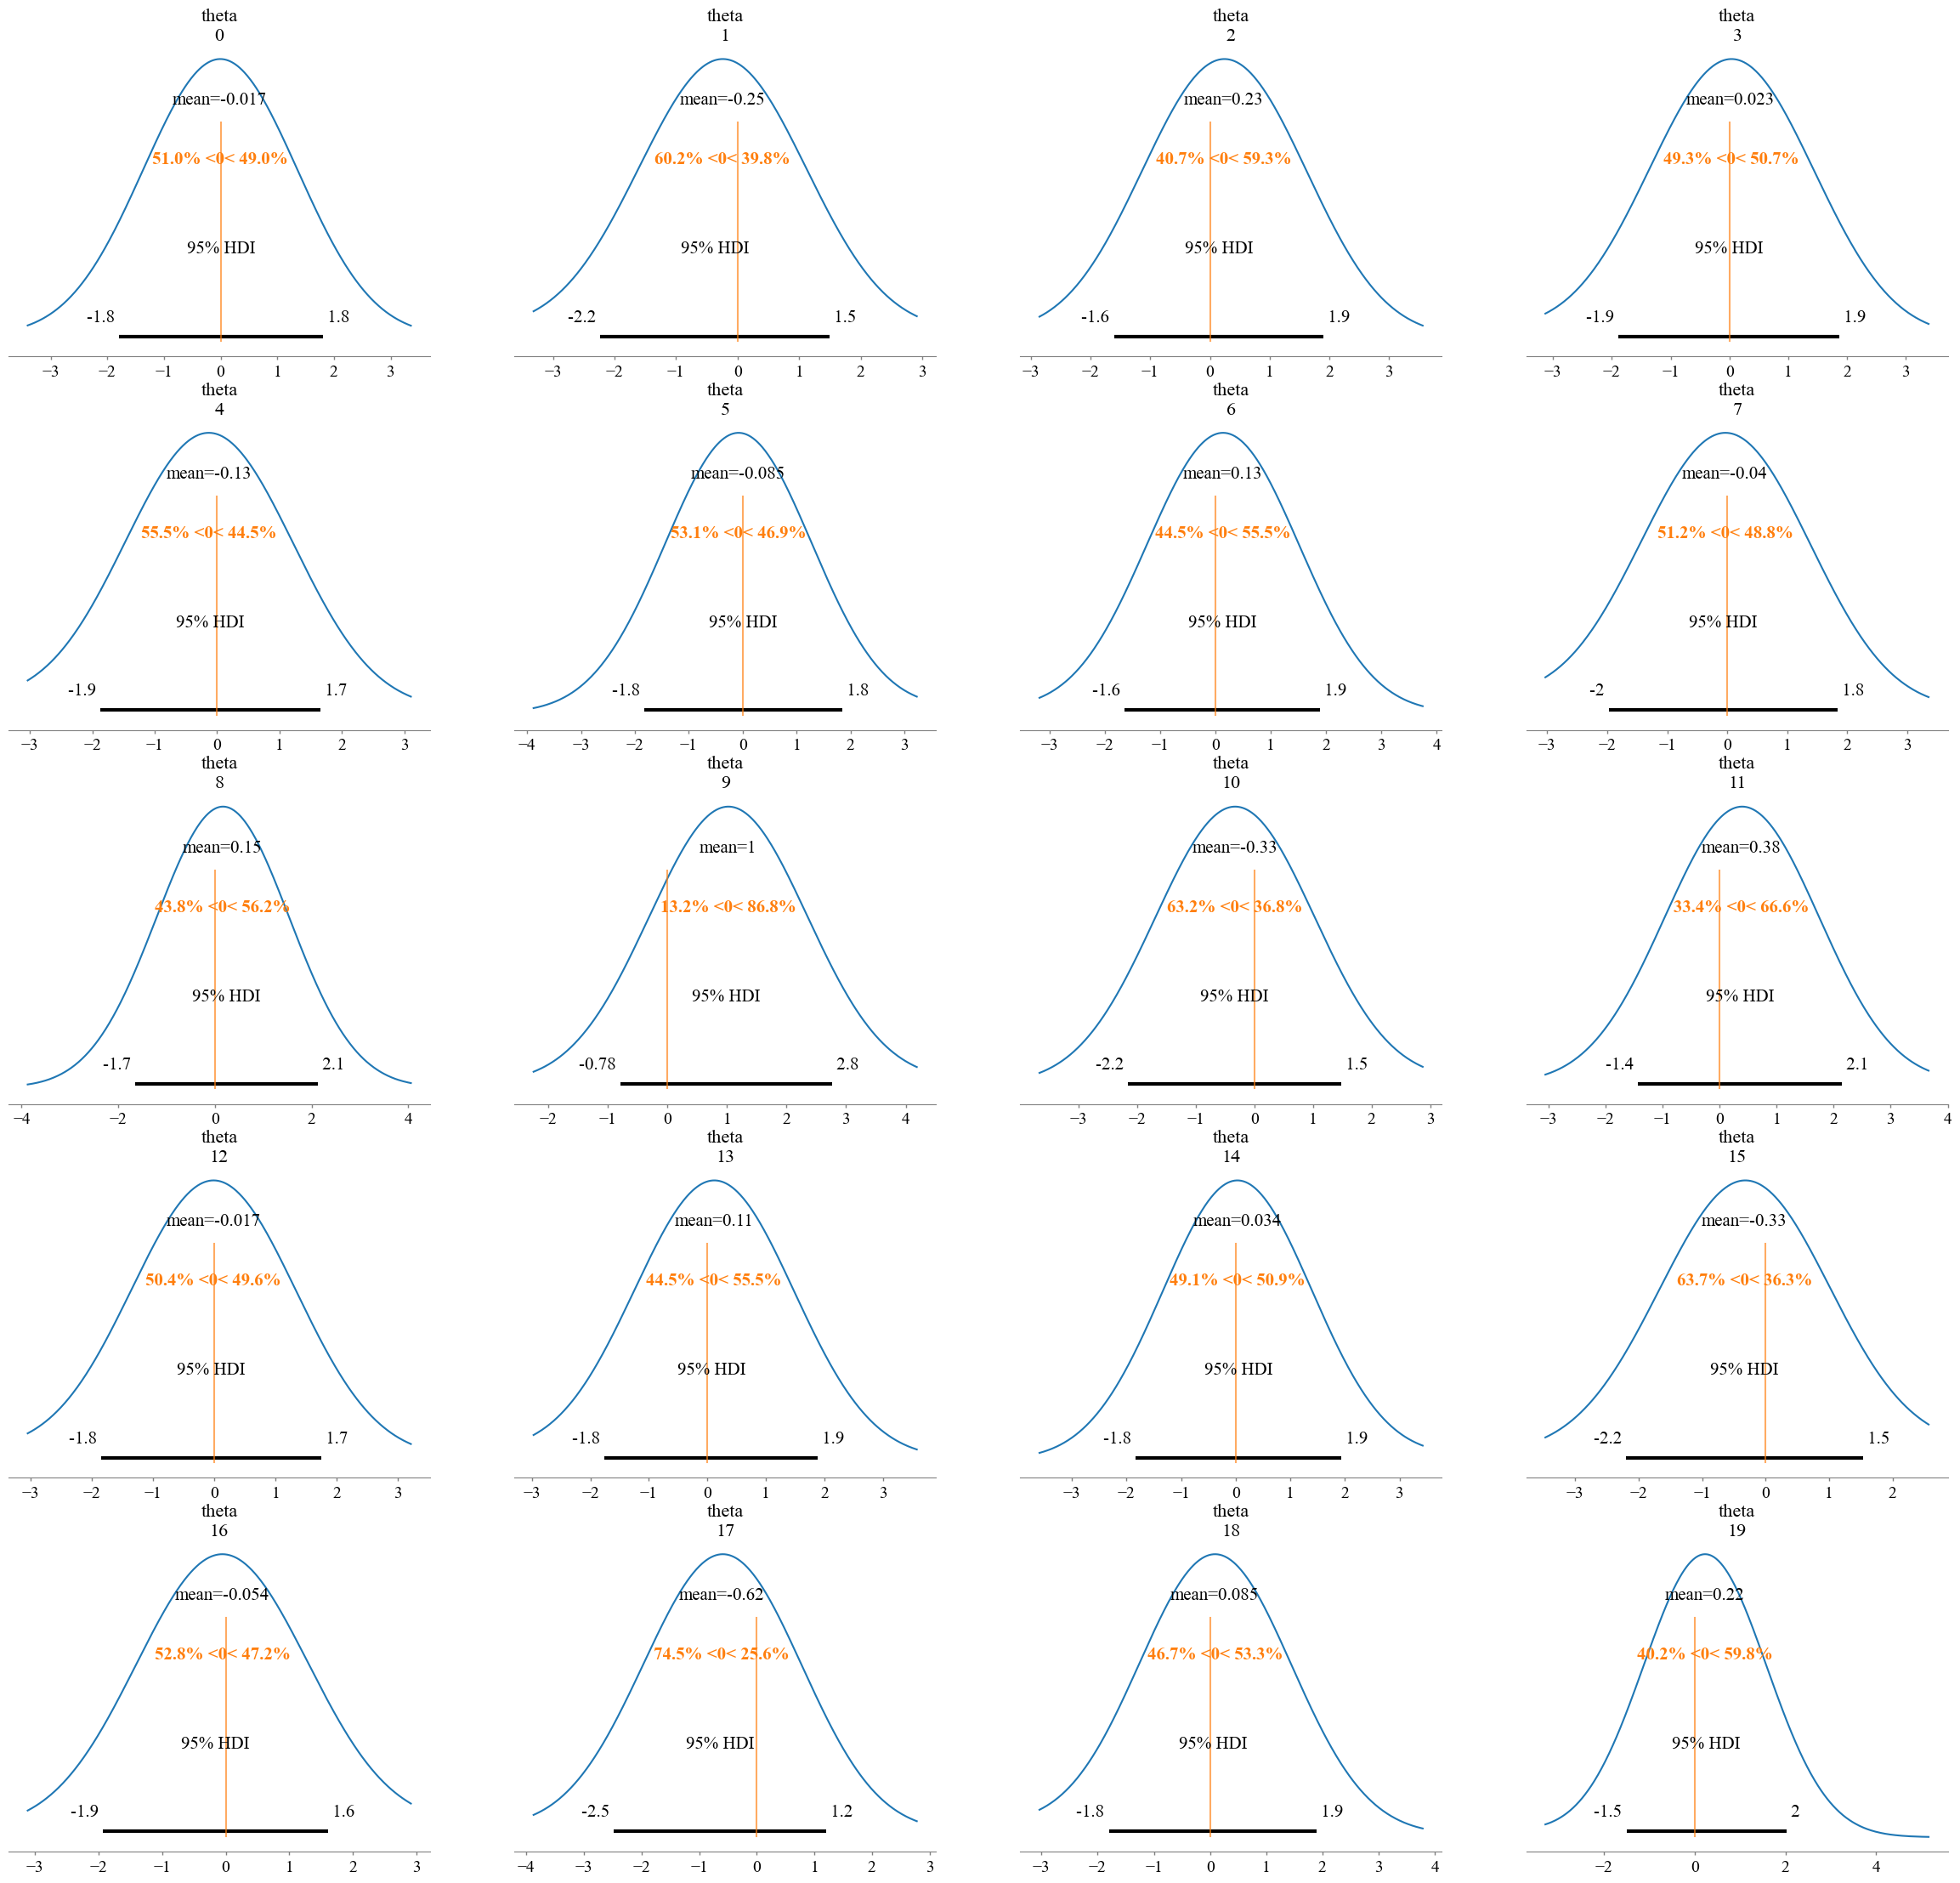

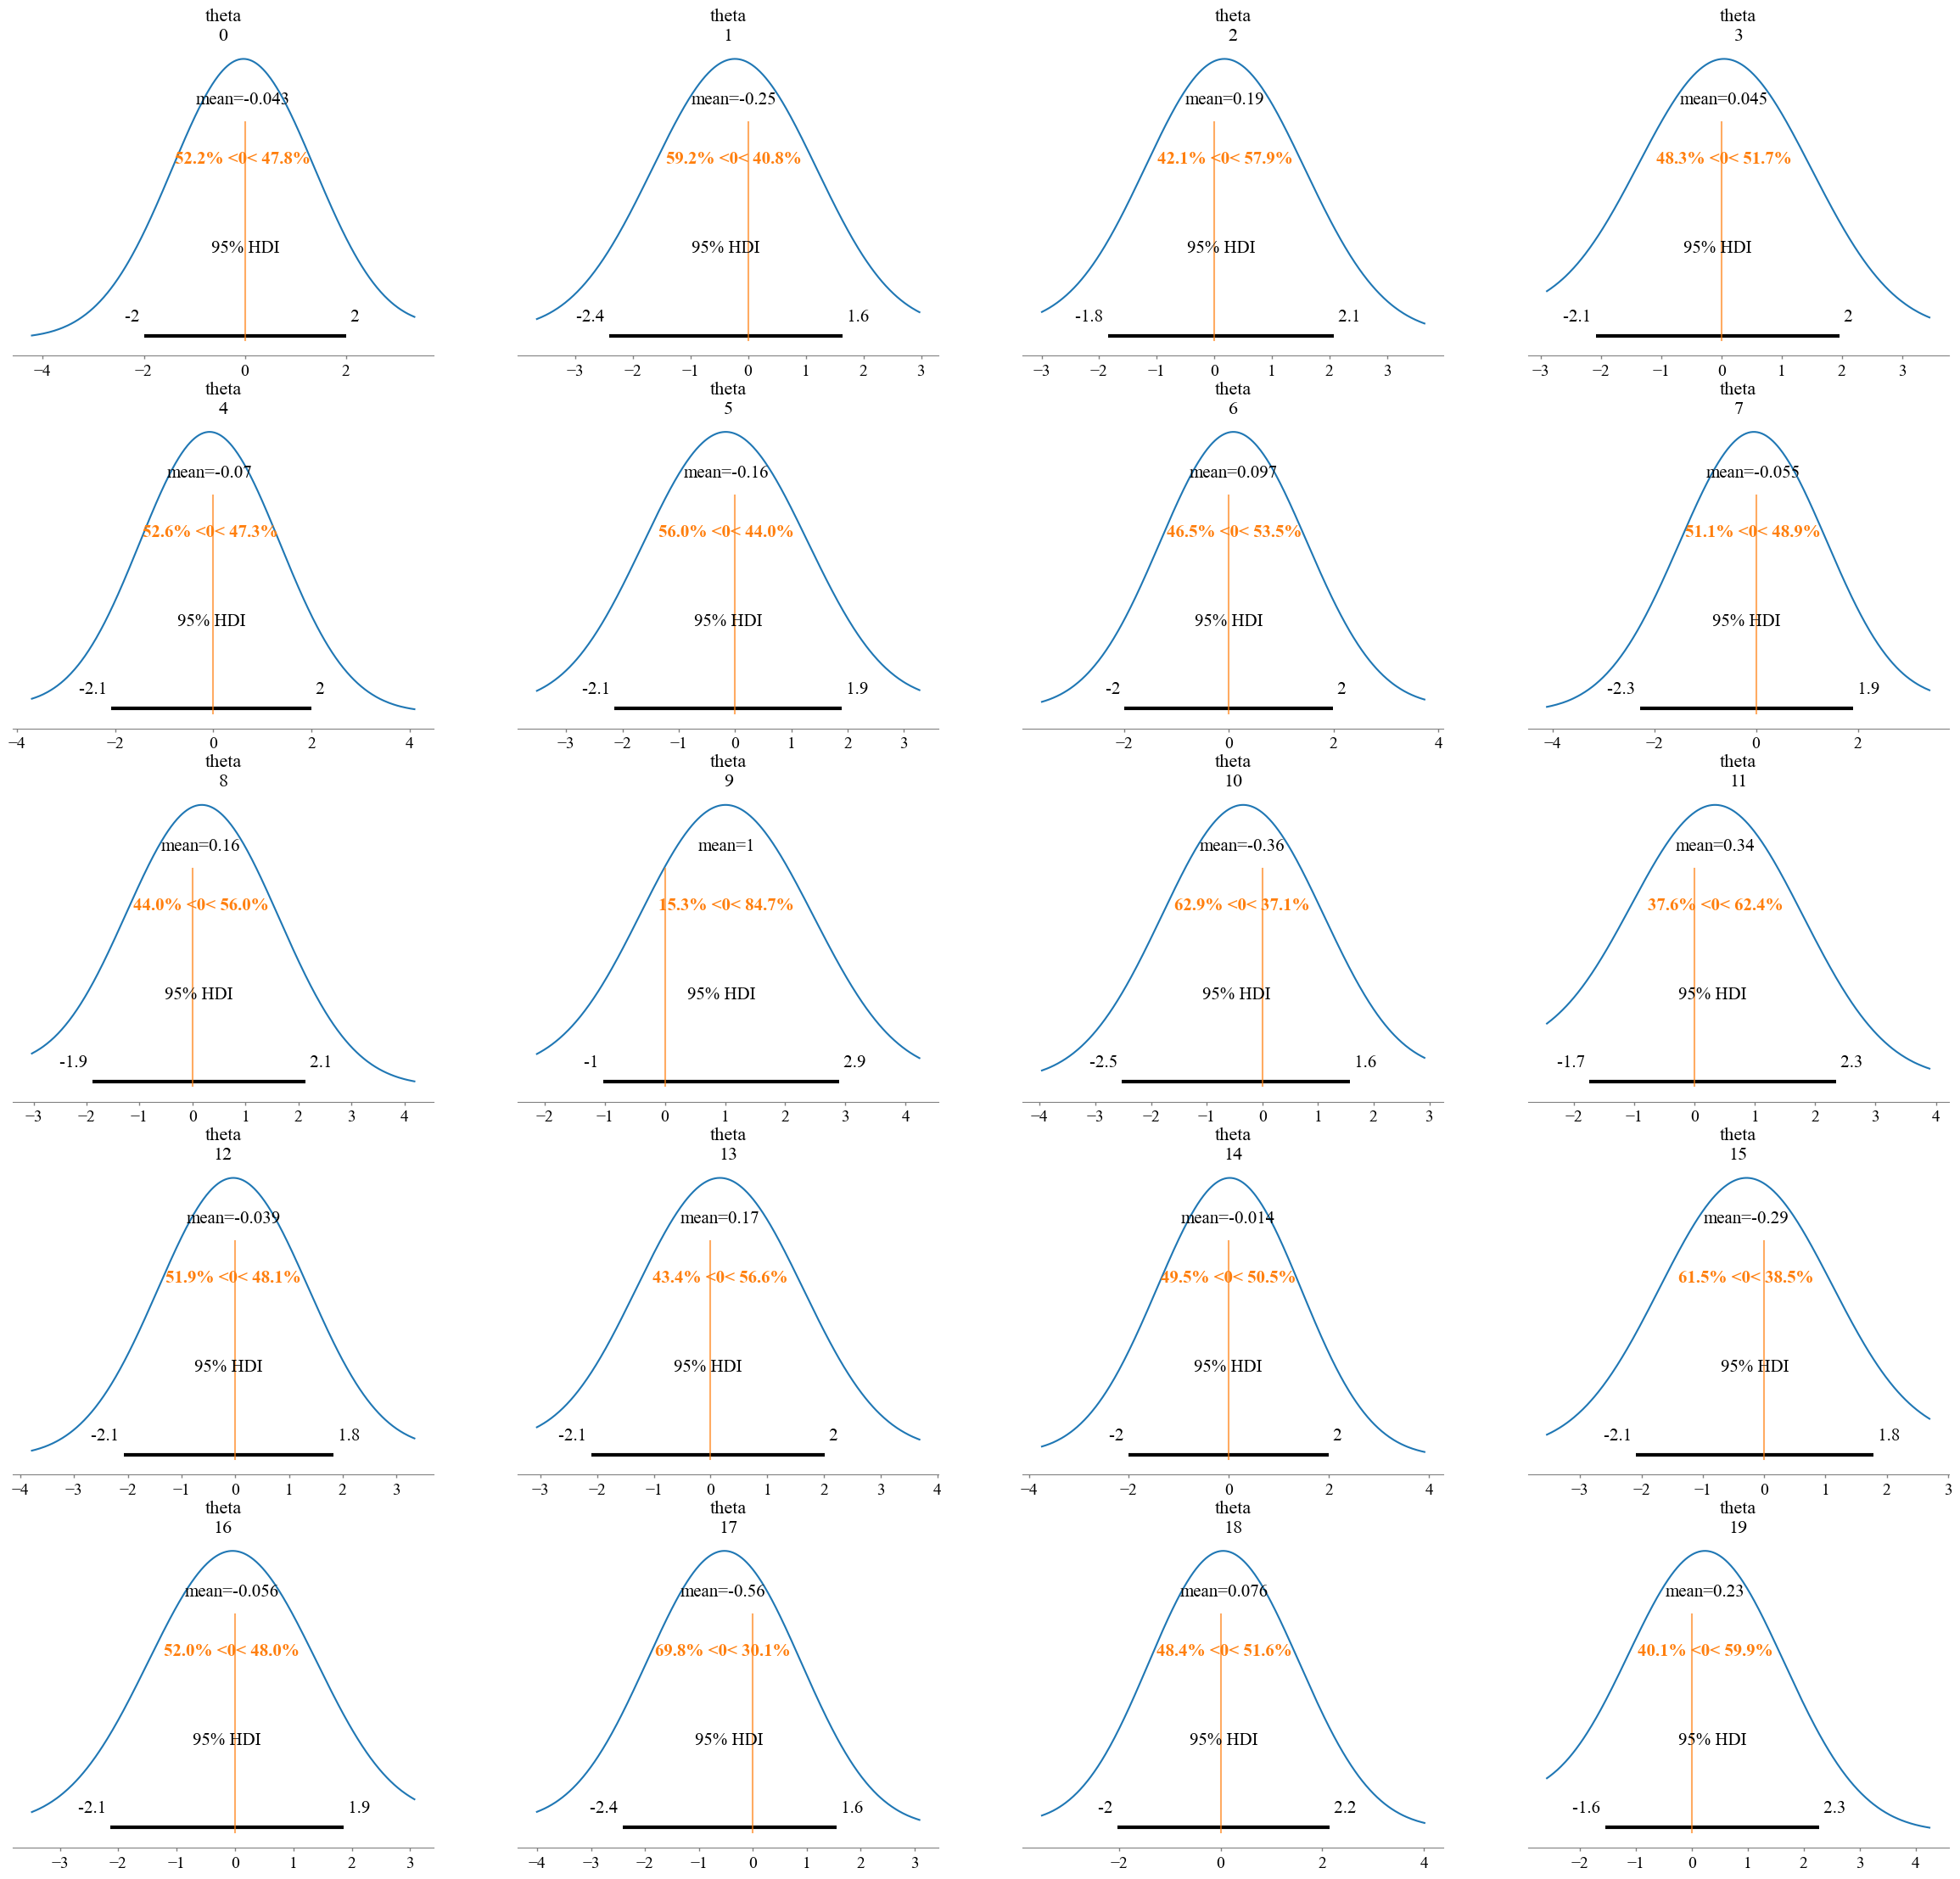

In [50]:
# Plot the comparison of the two methods
az.plot_posterior(trace_mcmc, var_names=["theta"], hdi_prob=0.95, point_estimate='mean', ref_val=0, kind='kde', round_to=2, bw=1)
az.plot_posterior(trace_vi, var_names=["theta"], hdi_prob=0.95, point_estimate='mean', ref_val=0, kind='kde', round_to=2, bw=1)
plt.show()

In [46]:
trace_vi['theta'].shape

(2000, 20)

## Langevin Monte Carlo (LMC)

We compare against LMC, which is easy to run given query access to $\nabla V$.

In [51]:
Nmcmc = 2000
h=0.01
iters=5000

X_LMC = langevin_monte_carlo(gradV, Nmcmc, d, h, iters=iters)

## Mean-field VI

We establish our model parameters, and then run our algorithm

In [52]:
### Establish approximating family M
mesh=0.2
trunc=2.9

MFVI_obj = MFVI(V, gradV, mesh, trunc,d)

### Optimization parameters
alpha = 0.1
step_size = 1e-2
step_sizev = 1e-2
num_iters = 2000
batch_size = 2000
lamb0 = np.ones((d, MFVI_obj.J))/(d*MFVI_obj.J)

In [53]:
MFVI_obj.SPGD(alpha, step_size, step_sizev, lamb0, batch_size=batch_size,num_iters=num_iters)

Iter: 50
Iter: 100
Iter: 150
Iter: 200
Iter: 250
Iter: 300
Iter: 350
Iter: 400
Iter: 450
Iter: 500
Iter: 550
Iter: 600
Iter: 650
Iter: 700
Iter: 750
Iter: 800
Iter: 850
Iter: 900
Iter: 950
Iter: 1000
Iter: 1050
Iter: 1100
Iter: 1150
Iter: 1200
Iter: 1250
Iter: 1300
Iter: 1350
Iter: 1400
Iter: 1450
Iter: 1500
Iter: 1550
Iter: 1600
Iter: 1650
Iter: 1700
Iter: 1750
Iter: 1800
Iter: 1850
Iter: 1900
Iter: 1950


## Generate + visualize

We compute samples following our mean-field approximation algorithm, and visually compare to LMC

In [34]:
Nmcmc = 2000
mfapprox_BLogR = MFVI_obj.gen_mfapprox(Nmcmc)

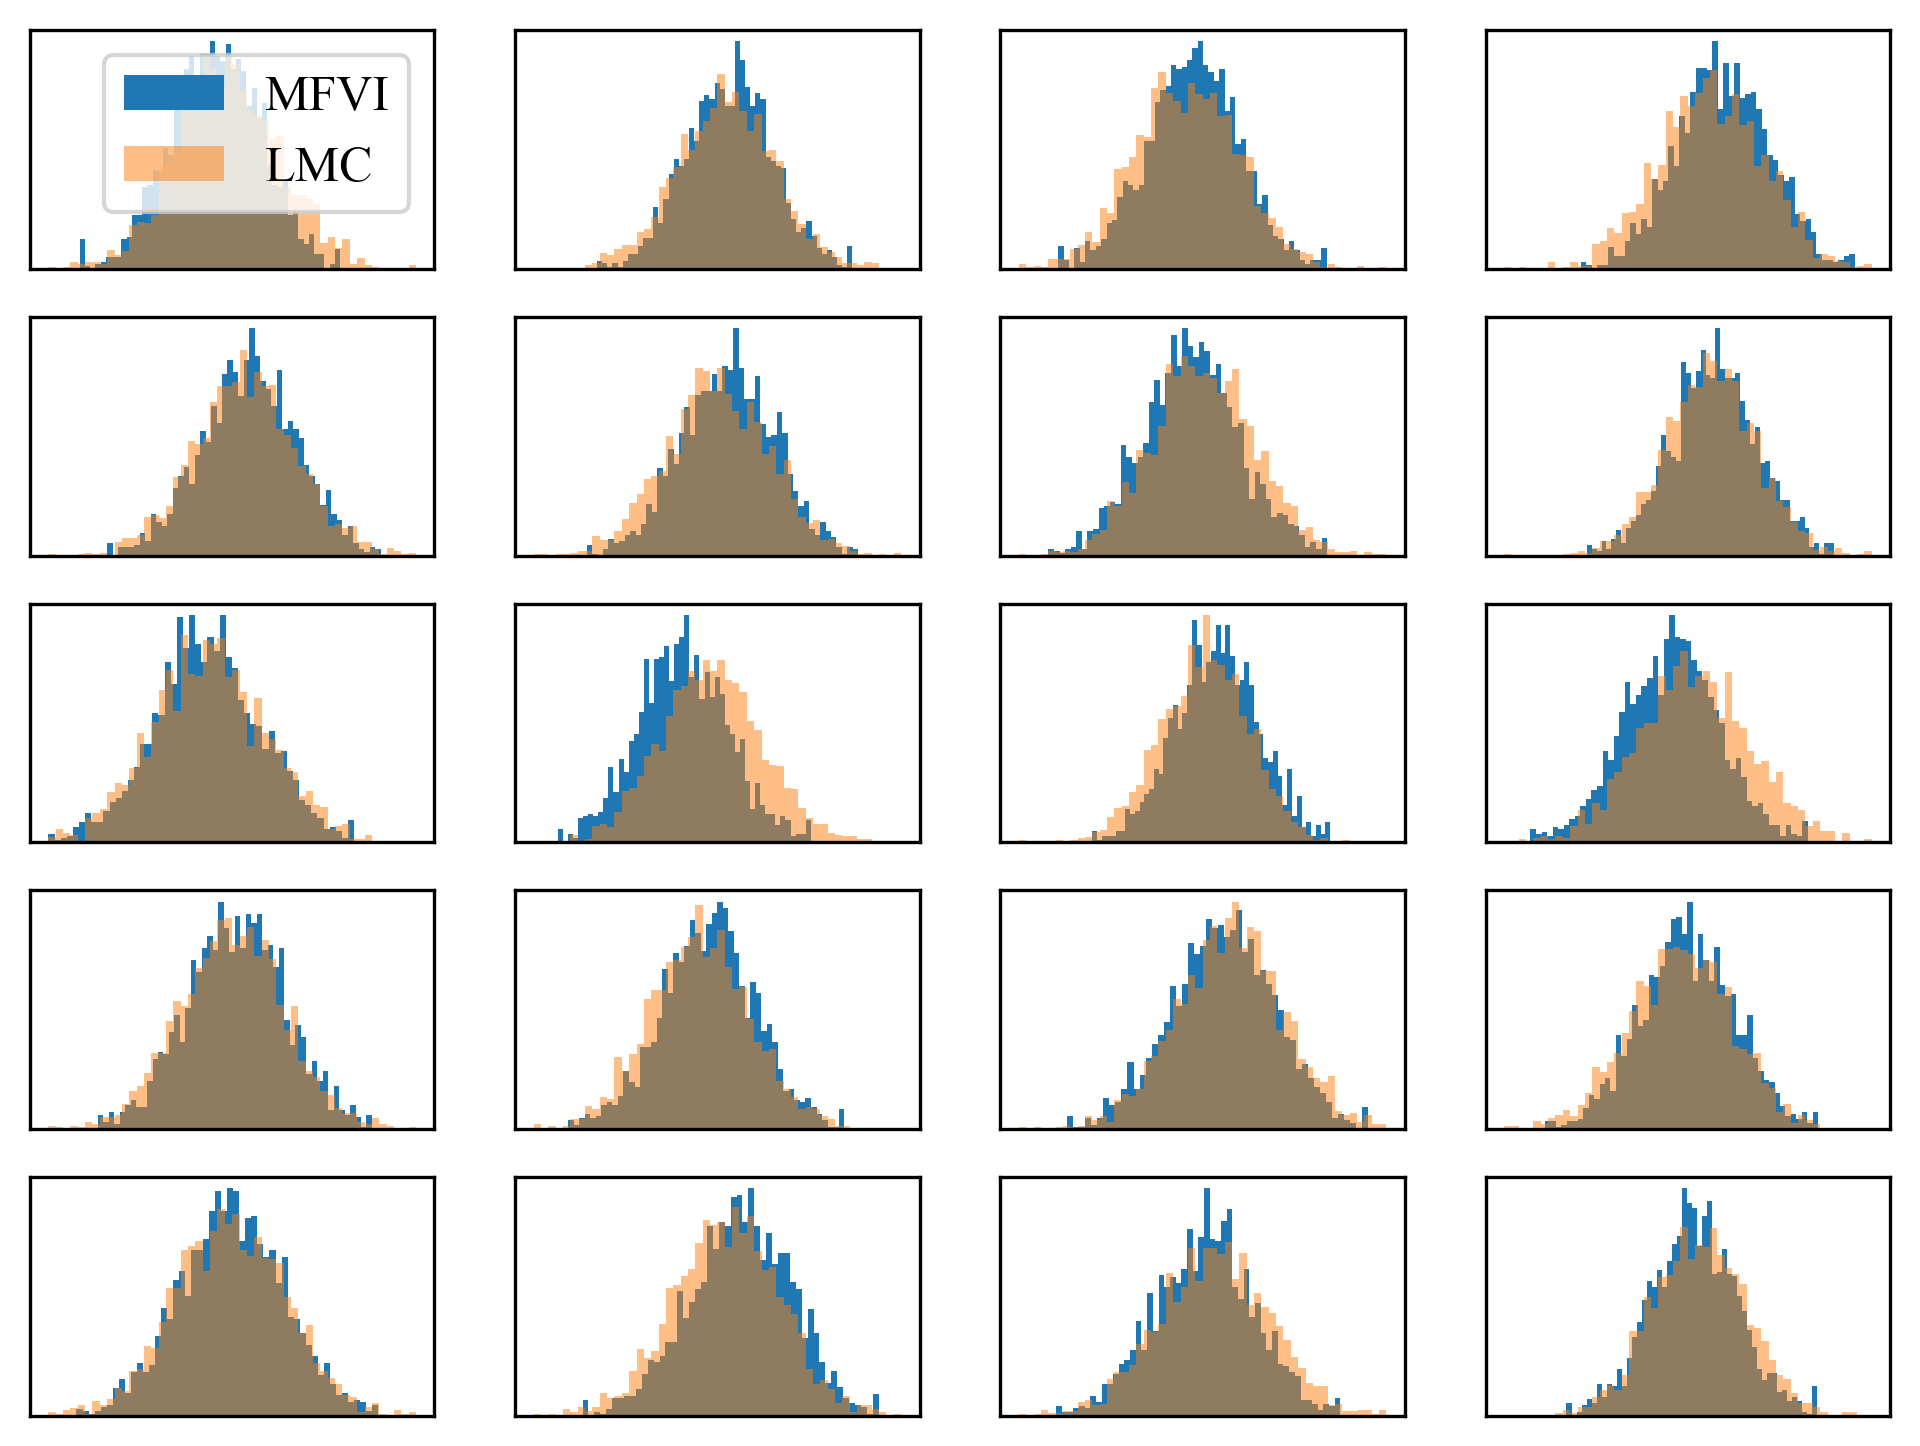

In [35]:
nrow = 5
ncol = 4
plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(nrow,ncol, dpi=300, figsize=(8, 6))


for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        d_ = ncol*i+j
        if i == j == 0:
            ax.hist(mfapprox_BLogR[:,d_], bins=50, alpha=1, density=True,label='MFVI')
            ax.hist(X_LMC[:,d_], bins=50, alpha=0.5, density=True,label='LMC')
            ax.legend(fontsize='12')
        else:
            ax.hist(mfapprox_BLogR[:,d_], bins=50, alpha=1, density=True)
            ax.hist(X_LMC[:,d_], bins=50, alpha=0.5, density=True)
        ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.show()

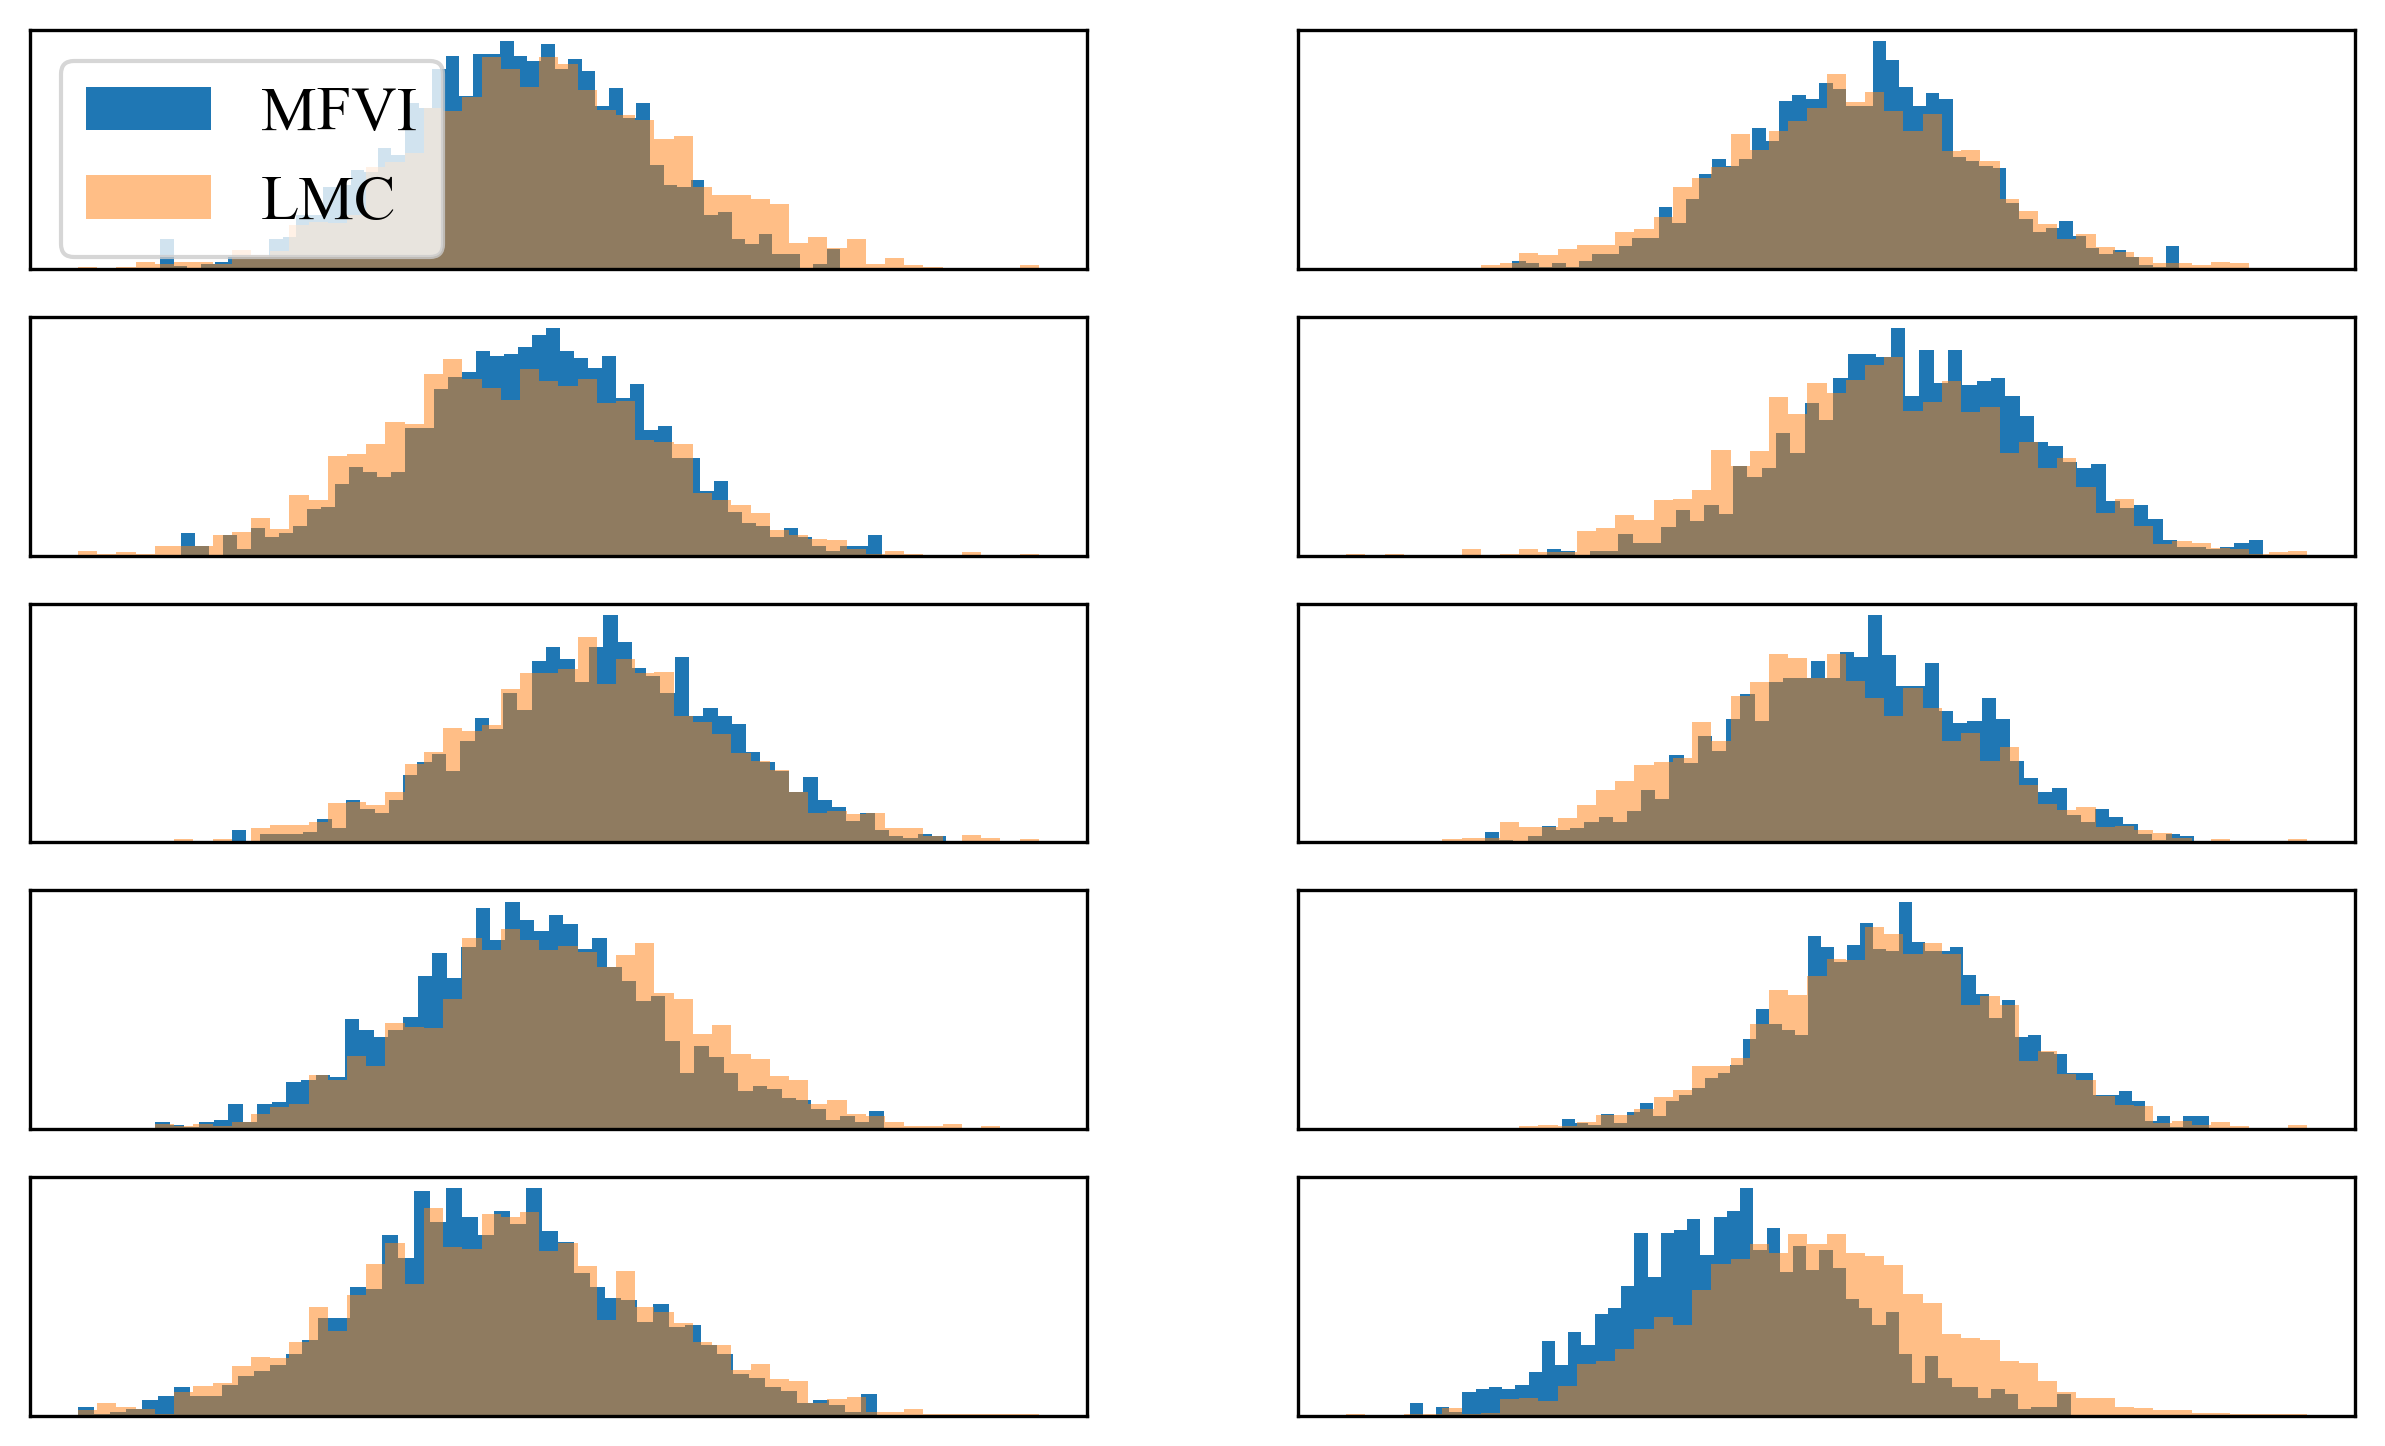

In [36]:
nrow = 5
ncol = 2
plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(nrow,ncol, dpi=300, figsize=(10, 6))


for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        d_ = ncol*i+j
        if i == j == 0:
            ax.hist(mfapprox_BLogR[:,d_], bins=50, alpha=1, density=True,label='MFVI')
            ax.hist(X_LMC[:,d_], bins=50, alpha=0.5, density=True,label='LMC')
            ax.legend(fontsize='15',loc='upper left',)
        else:
            ax.hist(mfapprox_BLogR[:,d_], bins=50, alpha=1, density=True)
            ax.hist(X_LMC[:,d_], bins=50, alpha=0.5, density=True)
        ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
        
plt.show()